# 01 - Build Model
---

### Description:
build_model script: should read train_potus_by_county.csv and then build, train and tune your best predictive model. The script should save your best model to the filesystem and it should also log data about the expected performance of the model

### Sections:
1. Setups & Reading in the Data
2. Exploration
3. Binary Encoding the Winner Column
4. Perform Train Test Split and Standardization
5. Model Selection and First Attempt
6. Explore resampling techniques
7. Adding PCA
8. Exporting Model

## 1. Setups & Reading in the Data

Importing libraries and stating data locations 

In [1]:
# importing the libraries tsert
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

from collections import Counter

In [2]:
# Stating the file locations
training_data = r"data/train_potus_by_county.csv"

In [3]:
# Reading in the data
df = pd.read_csv(training_data)

## 2. Exploration

Getting a high level overview of the data set

In [4]:
# Checking how the data looks
df.head(5)

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner
0,9278,37.9,12.6,21.3,13992.0,3802,2.42,51.9,16.6,31.6,63959.0,-0.69,-0.49,0.71,Barack Obama
1,18594,36.3,9.7,14.3,14622.0,6764,2.55,63.7,16.2,20.1,74330.0,-0.13,0.03,0.85,Barack Obama
2,662628,37.9,27.9,12.1,23909.0,267862,2.41,57.0,28.8,14.2,112687.0,-0.09,0.00,0.55,Barack Obama
3,21292,38.9,14.1,15.7,16829.0,8547,2.47,63.5,17.1,19.4,73643.0,-0.59,-0.43,0.57,Barack Obama
4,13252,34.5,15.0,15.8,13012.0,5222,2.47,53.7,20.7,25.6,56642.0,-1.16,-1.03,0.69,Barack Obama


In [5]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total population           1213 non-null   int64  
 1   Median age                 1213 non-null   float64
 2   % BachelorsDeg or higher   1213 non-null   float64
 3   Unemployment rate          1213 non-null   float64
 4   Per capita income          1213 non-null   float64
 5   Total households           1213 non-null   int64  
 6   Average household size     1213 non-null   float64
 7   % Owner occupied housing   1213 non-null   float64
 8   % Renter occupied housing  1213 non-null   float64
 9   % Vacant housing           1213 non-null   float64
 10  Median home value          1213 non-null   float64
 11  Population growth          1213 non-null   float64
 12  House hold growth          1213 non-null   float64
 13  Per capita income growth   1213 non-null   float

In [6]:
# Briefly checking the value distribution
df.describe()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth
count,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.019248e+05,39.954493,19.186480,9.837593,21118.305853,3.805129e+04,2.493817,60.339324,21.881946,17.779225,118892.893652,0.255754,0.340956,2.030660
std,3.659055e+05,4.652347,8.405849,3.865796,5046.038916,1.246130e+05,0.203625,8.929037,7.398402,10.125619,71060.359705,0.933166,0.939244,0.742566
min,3.240000e+02,24.500000,6.400000,1.000000,7908.000000,9.800000e+01,1.840000,15.000000,4.600000,2.600000,29622.000000,-2.090000,-2.120000,0.050000
25%,1.162900e+04,37.300000,13.400000,7.400000,17989.000000,4.555000e+03,2.360000,55.800000,17.300000,10.800000,78313.000000,-0.360000,-0.250000,1.680000
50%,2.591600e+04,40.000000,17.100000,9.600000,20265.000000,1.000800e+04,2.460000,61.800000,20.600000,15.000000,100381.000000,0.070000,0.160000,2.130000
75%,6.743000e+04,42.800000,22.200000,12.100000,23217.000000,2.583000e+04,2.580000,66.200000,25.000000,21.900000,135466.000000,0.720000,0.780000,2.570000
max,1.024050e+07,56.600000,61.600000,26.500000,51818.000000,3.292577e+06,3.710000,81.900000,74.200000,65.900000,815417.000000,6.070000,6.420000,4.180000


It appears that the data are continuous, and values are going on a different range, we will have to do a standardization to put them all on the Normal scale.

In [7]:
# checking if the data is balanced
df.groupby("Winner").size()

Winner
Barack Obama    264
Mitt Romney     949
dtype: int64

On a quick overview, Mitt Romney has a lot more training data compare to Barack Obama. We will likely need a resampling technique.

## 3. Binary Encoding the Winner Column

The label "Barack Obama" and "Mitt Romney" will need to be binary encoded into 1's and 0's before running any models.

In [8]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

# setting up the encoder
le = LabelEncoder()
le.fit(df['Winner'])

LabelEncoder()

In [9]:
# Performing the encoding
df['Winner'] = le.transform(df['Winner'].copy())
le.classes_

array(['Barack Obama', 'Mitt Romney'], dtype=object)

In [10]:
# Checking for the encoded version of the tag column
df['Winner'].unique()

array([0, 1])

## 4. Perform Train Test Split and Standardization


In [11]:
# Splitting up the feature vs label columns
features_col = [i for i in df.columns if i != "Winner"]

# Changing the data set into numpy array for preparation
X = np.array(df[features_col])
y = np.array(df['Winner'])

In [12]:
# Perform a simple train test split
X_train, X_test, y_train, y_test = train_test_split(
                                                X, 
                                                y, 
                                                random_state=1,
                                                train_size=0.75,
                                                shuffle=True,
                                                stratify=y # choosing stratigy due to imbalance data
                                            )

In [13]:
# Setting up the scaler to standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Selection and First Attempt


In [14]:
def run_SVC_model(X_train_data, y_train_data, X_test_data, y_test_data):
    """
    General bundling of all the common functionalities
    when we run the function
    """
    model = SVC()
    model.fit(X_train_data, y_train_data)
    
    y_pred = model.predict(X_test_data)
    
    print(classification_report_imbalanced(y_test_data, y_pred))

    print('-'*20)
    print(f"Accuracy: {accuracy_score(y_test_data, y_pred)}")
    
    return model

In [15]:
# First attempt with simple train test split
first_model = run_SVC_model(
            X_train_data = X_train_scaled,
            y_train_data = y_train,
            X_test_data = X_test_scaled,
            y_test_data = y_test
)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.29      0.98      0.42      0.53      0.26        66
          1       0.83      0.98      0.29      0.90      0.53      0.30       238

avg / total       0.82      0.83      0.44      0.80      0.53      0.29       304

--------------------
Accuracy: 0.8289473684210527


As expected, the result is overtrained on Mitt Romney scenarios.

## 6. Explore resampling techniques

#### Exploring
Per `sklearn` library guidance, setting up for Cross Validation (CV) to explore resampling techniques.

In [16]:
# Importing the required libraries for CV
from imblearn import FunctionSampler
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# choosing SVC as our model for experiments
classifier = SVC(kernel='rbf', probability=True)

# setting up the pipelines
pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=42), classifier),
    make_pipeline(ADASYN(random_state=42), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
]

In [17]:
# Using StratiiedKFolder
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

In [18]:
# Running the model to
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

pos_label = 0
disp = []

for model in pipeline:
    # compute the mean fpr/tpr to get the mean ROC curve
    mean_tpr, mean_fpr = 0.0, np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        model.fit(X[train], y[train])
        y_proba = model.predict_proba(X[test])

        pos_label_idx = np.flatnonzero(model.classes_ == pos_label)[0]
        fpr, tpr, thresholds = roc_curve(
            y[test], y_proba[:, pos_label_idx], pos_label=pos_label
        )
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Create a display that we will reuse to make the aggregated plots for
    # all methods
    disp.append(
        RocCurveDisplay(
            fpr=mean_fpr,
            tpr=mean_tpr,
            roc_auc=mean_auc,
            estimator_name=f"{model[0].__class__.__name__}",
        )
    )

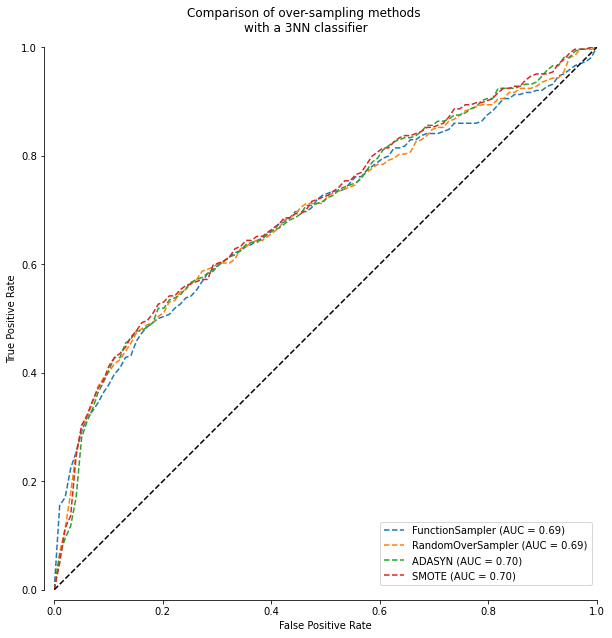

In [19]:
fig, ax = plt.subplots(figsize=(9, 9))
for d in disp:
    d.plot(ax=ax, linestyle="--")
ax.plot([0, 1], [0, 1], linestyle="--", color="k")
ax.axis("square")
fig.suptitle("Comparison of over-sampling methods \nwith a 3NN classifier")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
sns.despine(offset=10, ax=ax)
plt.tight_layout()
plt.show()

Based on the above result, most techniques have similar result besides SMOTE; we will use use RandomOverSampler for simplicity.

#### Application of `RandomOverSampler` 

In [20]:
# Setting up the sampler
ros = RandomOverSampler(random_state=1)

X_train_scaled_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

In [21]:
# Second Attempt: added oversampling technique to 
model_with_resampling = run_SVC_model(
                X_train_data = X_train_scaled_resampled,
                y_train_data = y_train_resampled,
                X_test_data = X_test_scaled,
                y_test_data = y_test
)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.62      0.89      0.62      0.75      0.54        66
          1       0.89      0.89      0.62      0.89      0.75      0.57       238

avg / total       0.84      0.84      0.68      0.84      0.75      0.56       304

--------------------
Accuracy: 0.8355263157894737


Although the f1 score for class `1` has decreased by 0.01, f1 score ofr class `0` has increased from 0.42 to 0.62.

## 7. Adding PCA

<AxesSubplot:>

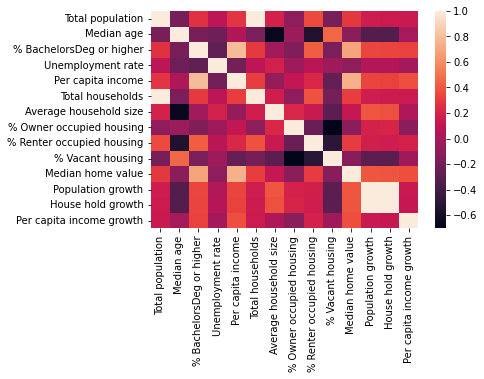

In [22]:
sns.heatmap(df[features_col].corr())

#### Notes:
- `Total Householdes` is highly correlated to `Total Population`
- `House hold growth` is highly correlated with `Population growth`
- `% BachelorsDeg or higher` is moderately correlated with `Per capital income`
- `Median home value` is moderately correlated with `% BachelorsDeg or higher` and `Per capita income`

Thus, we will utilize PCA to reduce 4-5 features to test if we can further improve the model.

In [23]:
from sklearn.decomposition import PCA

# Reducing the component from 15 to 10
pca = PCA(n_components=10, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [24]:
X_resampled_pca, y_resampled_pca = ros.fit_resample(X_train_pca, y_train)

In [25]:
# Third Attempt: added PCA to reudce contributors
model_with_Resampling_PCA = run_SVC_model(
                    X_train_data = X_resampled_pca,
                    y_train_data = y_resampled_pca,
                    X_test_data = X_test_pca,
                    y_test_data = y_test
)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.64      0.89      0.63      0.75      0.55        66
          1       0.90      0.89      0.64      0.89      0.75      0.58       238

avg / total       0.84      0.84      0.69      0.84      0.75      0.58       304

--------------------
Accuracy: 0.8355263157894737


The f1 score of class `0` has further improved by 0.1.

## 8. Exporting the model

Serializing the `model_with_Resampling_PCA` for future usages since this is the best model in the 3 hours assignment time.

In [26]:
# Import serializing library
import pickle

In [27]:
# Exporting the model
filename = r"03_model_binary.pickle"

pickle.dump(model_with_Resampling_PCA, open(filename, 'wb'))